In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# 유실, 유기동물 발생 현황

In [2]:
df2 = pd.read_excel('유기동물데이터.xlsx', sheet_name='지역별 유실,유기동물 발생현황 월별' )

In [3]:
df2 = df2.melt(id_vars='구분', var_name='기간', value_name='발생현황')

### 2016.01.01 ~ 2020.12.31 기간동안 발생현황, 월별

<AxesSubplot:xlabel='기간', ylabel='발생현황'>

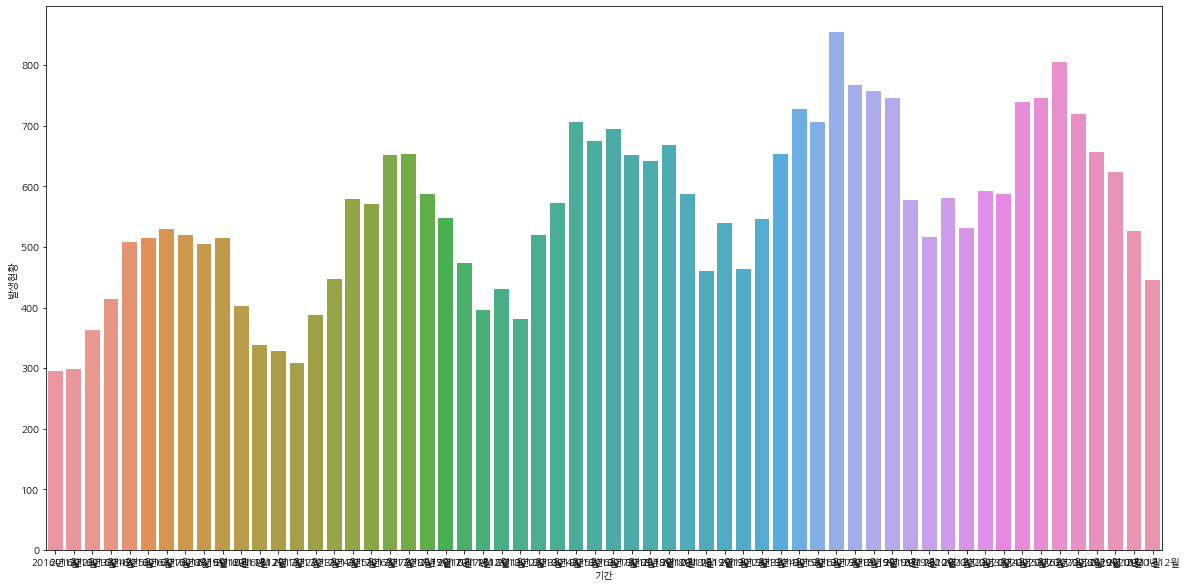

In [4]:
plt.figure(figsize=(20,10))
sns.barplot(data=df2, x='기간', y='발생현황', ci=None)

In [5]:
df2['년도'] = df2['기간'].str.split('년').str.get(0)
df2['월'] = df2['기간'].str.split('년').str.get(1).str.split('월').str.get(0)

### 월별 발생현황
 - 겨울에 적게 발생, 여름에 많이 발생

<AxesSubplot:xlabel='월', ylabel='발생현황'>

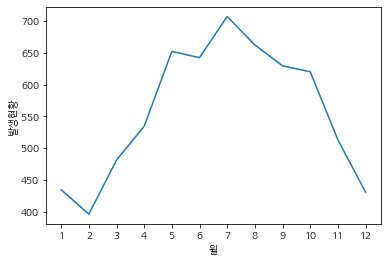

In [6]:
sns.lineplot(data=df2, x='월', y='발생현황', ci=None)

### 년도별 발생현황
 - 꾸준히 증가하다가 2019년 부터 감소추세

<AxesSubplot:xlabel='년도', ylabel='발생현황'>

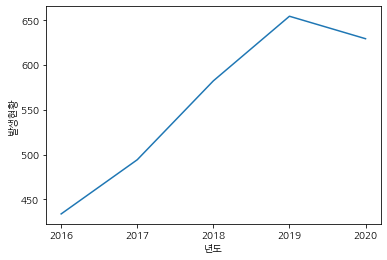

In [7]:
sns.lineplot(data=df2, x='년도', y='발생현황', ci=None)

### 지역별 발생현황
 - 경기도가 압도적으로 많이 발생하고 차례대로 경기, 서울, 부산 순으로 발생

<AxesSubplot:xlabel='구분', ylabel='발생현황'>

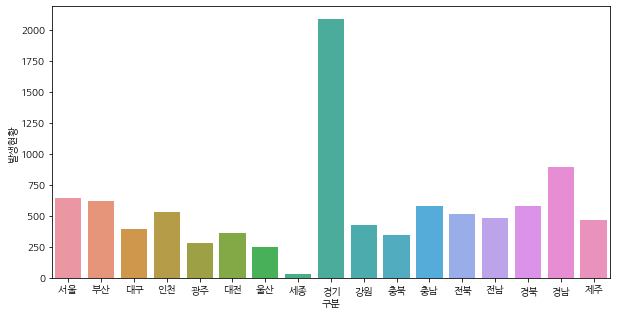

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='구분', y='발생현황', ci=None)

# 기타 축종 발생 현황

In [9]:
df4 = pd.read_excel('유기동물데이터.xlsx', sheet_name='기타축종 발생현황' )

In [10]:
df4 = df4.melt(id_vars='구분', var_name='년도', value_name='발생현황')

### 기타축종별, 년도별 발생 현황

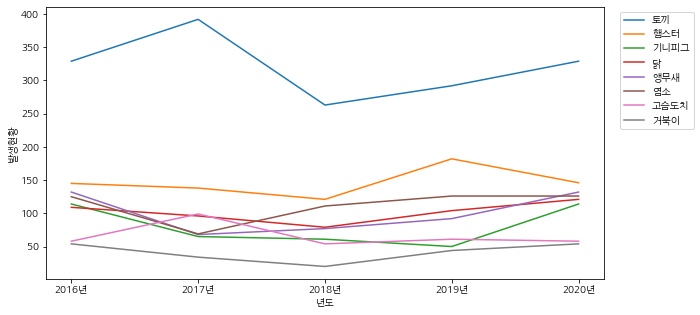

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df4,x='년도',y='발생현황',hue='구분')
plt.legend(bbox_to_anchor=(1.02,1),loc=2)

In [12]:
p = df4.groupby('구분')['발생현황'].mean().sort_values(ascending=False)
p = p.reset_index()

### 기타 축종별 발생 총합
    - 토끼가 압도적으로 많고 그 뒤로 햄스터가 있다.
    - 앵무새와 기니피그는 의외로 많이 발생

<AxesSubplot:xlabel='구분', ylabel='발생현황'>

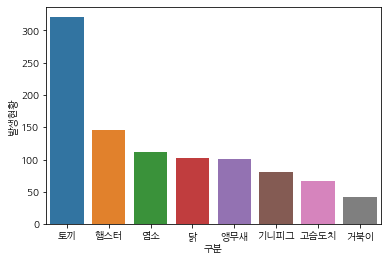

In [13]:
sns.barplot(data=p, x='구분', y='발생현황', ci=None)

# 유기, 유실 동물 처리현황

In [14]:
df3 = pd.read_excel('유기동물데이터.xlsx', sheet_name='유실, 유기동물 처리현황 년별' )

In [15]:
df3 = df3.melt(id_vars='구분', var_name='년도', value_name='발생현황')

In [16]:
df3_구분 = df3.groupby(['구분'])['발생현황'].sum()

In [17]:
ratio = list(df3_구분)
labels = ['기증', '미포획', '반환', '방사', '보호중', '안락사', '입양', '자연사']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

### 유기, 유실 동물 처리현황 비율

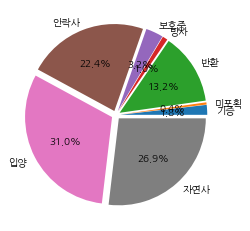

In [18]:
plt.pie(ratio, labels=labels, autopct='%.1f%%', explode=explode)
plt.show()

### 년도별 안락사 현황

<AxesSubplot:xlabel='년도', ylabel='발생현황'>

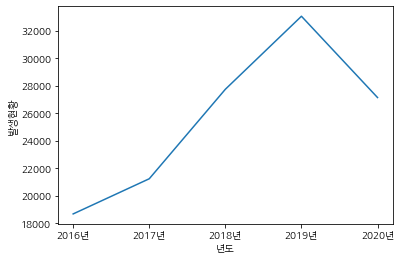

In [19]:
df3_안락사 = df3[df3['구분'] == '안락사']
sns.lineplot(data=df3_안락사, x='년도', y='발생현황', ci=None)

### 년도별 입양 현황

<AxesSubplot:xlabel='년도', ylabel='발생현황'>

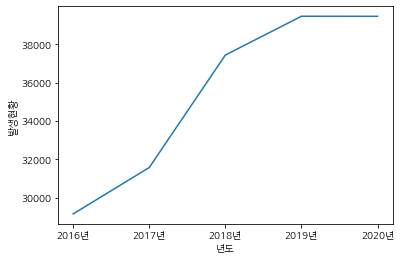

In [20]:
df3_입양 = df3[df3['구분'] == '입양']
sns.lineplot(data=df3_입양, x='년도', y='발생현황', ci=None)